In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from wgan import WassersteinGAN

Let's first load the MNIST dataset

In [2]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data() #load mnist data
train_images = train_images.reshape([train_images.shape[0], 28, 28, 1]).astype('float32')
train_images = (train_images - 127.5) / 127.5

In [3]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256
train_data = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

2022-10-26 10:58:58.617131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 10:58:58.628751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 10:58:58.629437: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 10:58:58.630751: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
model = WassersteinGAN((28, 28, 1), 100, 3, batch_size=BATCH_SIZE)

In [ ]:
c_losses, g_losses = model.train(train_data, num_epochs=40, save_path='/saved_images')

In [6]:
test_noise = tf.random.normal([28, 100])
preds = model.predict(test_noise)

1/1 [==============================] - 0s 284ms/step


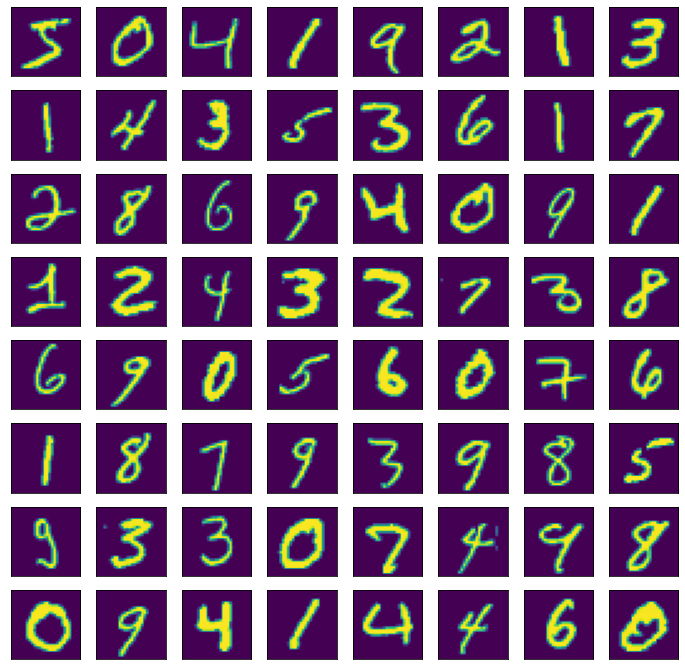

In [7]:
def image_grid(images, fig):
    # Create a figure to contain the plot.
    for i in range(28):
        # Start next subplot.
        axs = fig.add_subplot(8, 8, i + 1)
        axs.set_xticks([])
        axs.set_yticks([])
        axs.imshow(np.clip(images[i] * 0.5 + 0.5, 0, 1))


fig1 = plt.figure(figsize=(12,12))
image_grid(train_images[:64], fig1)
plt.show()

IndexError: index 28 is out of bounds for axis 0 with size 28

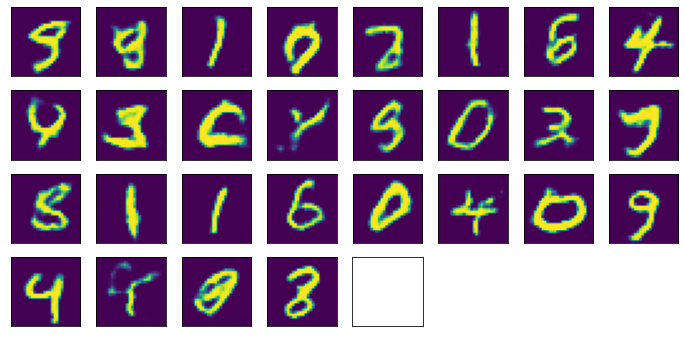

In [8]:
fig2 = plt.figure(figsize=(12,12))
image_grid(preds, fig2)